# General Assembly London (DAT-11)

## Final Project - Shan Sun

This project explores an aspect in a specialised area of international taxation - transfer pricing ('TP'). TP sets prices for goods and services transacted between related parties within a multinational national enpterise ('MNE'). Since 2013, over thirty countries' tax authorities signed up a global initiative to combat Base Erosion and Profit Shifting ('BEPS') using international tax loopholes including TP. One area of particular concern is that MNEs are using TP guidelines on intangible property ('IP') transactions to move profits around the world and achieve aggressive overall tax rate as a group. In this context, this project assumes the following hypothesis:

* Service conglomerates in developed countries with intensive investment in intangible and/or highly geared capital structure are likely to adopt aggressive tax planning worldwide and erode home country tax base. 

In [105]:
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl
import statsmodels.api as sm
import seaborn as sns

%matplotlib inline

df = pd.read_csv("TP.csv").dropna()

print df.columns

Index([u'company', u'tax_elasticity_2006', u'tax_elasticity_2007',
       u'tax_elasticity_2008', u'tax_elasticity_2009', u'tax_elasticity_2010',
       u'tax_elasticity_2011', u'tax_elasticity_2012',
       u'intangible_asset_intensity_ 2006',
       u'intangible_asset_intensity_ 2007',
       u'intangible_asset_intensity_ 2008',
       u'intangible_asset_intensity_ 2009',
       u'intangible_asset_intensity_ 2010',
       u'intangible_asset_intensity_ 2011',
       u'intangible_asset_intensity_ 2012', u'intangible_PL_intensity_ \n2006',
       u'intangible_PL_intensity_ \n2007', u'intangible_PL_intensity_ \n2008',
       u'intangible_PL_intensity_ \n2009', u'intangible_PL_intensity_ \n2010',
       u'intangible_PL_intensity_ \n2011', u'intangible_PL_intensity_ \n2012',
       u'gearing_2006\n', u'gearing_2007\n', u'gearing_2008\n',
       u'gearing_2009\n', u'gearing_2010\n', u'gearing_2011\n',
       u'gearing_2012\n', u'om_2006', u'om_2007', u'om_2008', u'om_2009',
       u'om_2010

In [106]:
df.describe()

,intangible_asset_intensity_ 2006,intangible_asset_intensity_ 2008,intangible_asset_intensity_ 2009,intangible_asset_intensity_ 2010,intangible_asset_intensity_ 2011,intangible_asset_intensity_ 2012,intangible_PL_intensity_ 2006,intangible_PL_intensity_ 2007,intangible_PL_intensity_ 2008,intangible_PL_intensity_ 2009,intangible_PL_intensity_ 2010,intangible_PL_intensity_ 2011,intangible_PL_intensity_ 2012,gearing_2006,gearing_2007,gearing_2008,gearing_2009,gearing_2010,gearing_2011,gearing_2012
count,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000
mean,12.607205,14.316840,14.753906,14.723958,15.176215,15.621094,4.004774,3.977431,4.266493,4.554688,4.279948,4.120226,4.132812,86.704175,82.733663,100.474102,91.250625,85.233451,87.056146,89.756272
std,17.107810,18.199582,18.483419,18.403761,18.649549,18.977284,8.585726,9.025193,12.532725,14.304078,16.427877,8.753479,7.527670,107.805590,95.165243,115.174115,105.727567,97.939690,98.927703,104.063375
min,-7.000000,-4.000000,-3.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.537500,21.637500,24.232500,23.545000,22.707500,23.407500,24.270000
50%,4.000000,6.000000,6.000000,6.000000,7.000000,7.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,55.445000,56.540000,67.450000,62.320000,58.130000,58.395000,60.940000
75%,19.000000,22.000000,24.000000,23.000000,24.000000,25.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,5.000000,107.432500,107.425000,130.405000,117.580000,109.642500,111.280000,113.930000
max,95.000000,92.000000,93.000000,88.000000,91.000000,89.000000,175.000000,261.000000,412.000000,540.000000,584.000000,241.000000,96.000000,985.010000,843.160000,975.830000,892.420000,886.290000,833.590000,967.230000


In [107]:
df.count()

company                             2304
tax_elasticity_2006                 2304
tax_elasticity_2007                 2304
tax_elasticity_2008                 2304
tax_elasticity_2009                 2304
tax_elasticity_2010                 2304
tax_elasticity_2011                 2304
tax_elasticity_2012                 2304
intangible_asset_intensity_ 2006    2304
intangible_asset_intensity_ 2007    2304
intangible_asset_intensity_ 2008    2304
intangible_asset_intensity_ 2009    2304
intangible_asset_intensity_ 2010    2304
intangible_asset_intensity_ 2011    2304
intangible_asset_intensity_ 2012    2304
intangible_PL_intensity_ \n2006     2304
intangible_PL_intensity_ \n2007     2304
intangible_PL_intensity_ \n2008     2304
intangible_PL_intensity_ \n2009     2304
intangible_PL_intensity_ \n2010     2304
intangible_PL_intensity_ \n2011     2304
intangible_PL_intensity_ \n2012     2304
gearing_2006\n                      2304
gearing_2007\n                      2304
gearing_2008\n  

In [108]:
df = df[df.tax_elasticity_2012 != "#DIV/0!"]
df = df[df.om_2012 != "n.s."]
df.columns

Index([u'company', u'tax_elasticity_2006', u'tax_elasticity_2007',
       u'tax_elasticity_2008', u'tax_elasticity_2009', u'tax_elasticity_2010',
       u'tax_elasticity_2011', u'tax_elasticity_2012',
       u'intangible_asset_intensity_ 2006',
       u'intangible_asset_intensity_ 2007',
       u'intangible_asset_intensity_ 2008',
       u'intangible_asset_intensity_ 2009',
       u'intangible_asset_intensity_ 2010',
       u'intangible_asset_intensity_ 2011',
       u'intangible_asset_intensity_ 2012', u'intangible_PL_intensity_ \n2006',
       u'intangible_PL_intensity_ \n2007', u'intangible_PL_intensity_ \n2008',
       u'intangible_PL_intensity_ \n2009', u'intangible_PL_intensity_ \n2010',
       u'intangible_PL_intensity_ \n2011', u'intangible_PL_intensity_ \n2012',
       u'gearing_2006\n', u'gearing_2007\n', u'gearing_2008\n',
       u'gearing_2009\n', u'gearing_2010\n', u'gearing_2011\n',
       u'gearing_2012\n', u'om_2006', u'om_2007', u'om_2008', u'om_2009',
       u'om_2010

In [109]:
#select 2012 only as a trial and rename the columns to clean up data

data_2012 = df[['company','tax_elasticity_2012','intangible_asset_intensity_ 2012','intangible_PL_intensity_ \n2012','gearing_2012\n','om_2012', 'main_activity','country', 'no_of_subs']].copy()
data_2012.columns = ['company','elasticity12','IPasset12','IPPL12','gearing12','OM12','activity','country','subs']
data_2012.count()

company         1926
elasticity12    1926
IPasset12       1926
IPPL12          1926
gearing12       1926
OM12            1926
activity        1926
country         1926
subs            1926
dtype: int64

In [110]:
data_2012.head()

,company,elasticity12,IPasset12,IPPL12,gearing12,OM12,activity,country,subs
1,3D SYSTEMS CORPORATION,0.25,51,7,25.43,17.13,Services,United States of America,35
2,3M COMPANY,0.72,27,5,57.47,21.68,Services,United States of America,121
3,888 HOLDINGS PLC,1.32,52,7,0.54,10.3,Services,Gibraltar,15
4,A & A MATERIAL CORP,-0.77,1,1,384.16,0.95,Manufacturing,Japan,11
5,"A-DATA TECHNOLOGY CO., LTD.",1.19,1,1,74.67,2.59,Manufacturing; Wholesale,Taiwan,11


In [111]:
data_2012.dtypes

company          object
elasticity12     object
IPasset12         int64
IPPL12            int64
gearing12       float64
OM12             object
activity         object
country          object
subs             object
dtype: object

In [112]:
data_2012.elasticity12[1]

'0.25'

In [113]:
data_2012['elasticity12'] = data_2012['elasticity12'].apply(lambda x: float(x))

In [114]:
data_2012['OM12'] = data_2012['OM12'].apply(lambda x: float(x))

In [115]:
data_2012['subs'] = data_2012['subs'].apply(lambda x: float(x.replace(",", "")))

In [116]:
data_2012.subs[1]

35.0

In [117]:
data_2012.loc[data_2012.OM12 > 100, 'OM12'] = 100.0

In [118]:
data_2012.describe()

,elasticity12,IPasset12,IPPL12,gearing12,OM12,subs
count,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000
mean,0.675914,16.232087,3.571651,87.972285,11.488079,71.828141
std,10.879861,19.189977,5.611473,93.312878,12.079024,158.645497
min,-418.570000,0.000000,0.000000,0.000000,0.000000,11.000000
25%,0.640000,1.000000,0.000000,26.495000,4.325000,16.000000
50%,0.900000,8.000000,1.000000,63.190000,8.050000,29.000000
75%,1.110000,26.000000,4.000000,113.970000,14.160000,66.000000
max,125.250000,89.000000,53.000000,813.190000,100.000000,2670.000000


In [119]:
#take a peak
print '2012 mean'
print data_2012.mean()
# print data_2012.groupby('activity').elasticity12.mean() - John. this won't work
print ''
print '2012 count'
print data_2012.count()
print ''
print '2012 skewness'
print data_2012.skew()
print ''
print data_2012.shape
print ''
data_2012.head()

2012 mean
elasticity12     0.675914
IPasset12       16.232087
IPPL12           3.571651
gearing12       87.972285
OM12            11.488079
subs            71.828141
dtype: float64

2012 count
company         1926
elasticity12    1926
IPasset12       1926
IPPL12          1926
gearing12       1926
OM12            1926
activity        1926
country         1926
subs            1926
dtype: int64

2012 skewness
elasticity12   -29.095713
IPasset12        1.332810
IPPL12           2.846344
gearing12        2.650888
OM12             3.148496
subs             8.821373
dtype: float64

(1926, 9)



,company,elasticity12,IPasset12,IPPL12,gearing12,OM12,activity,country,subs
1,3D SYSTEMS CORPORATION,0.25,51,7,25.43,17.13,Services,United States of America,35.0
2,3M COMPANY,0.72,27,5,57.47,21.68,Services,United States of America,121.0
3,888 HOLDINGS PLC,1.32,52,7,0.54,10.30,Services,Gibraltar,15.0
4,A & A MATERIAL CORP,-0.77,1,1,384.16,0.95,Manufacturing,Japan,11.0
5,"A-DATA TECHNOLOGY CO., LTD.",1.19,1,1,74.67,2.59,Manufacturing; Wholesale,Taiwan,11.0


125.25
-418.57
Axes(0.125,0.125;0.775x0.775)


(-10, 80)

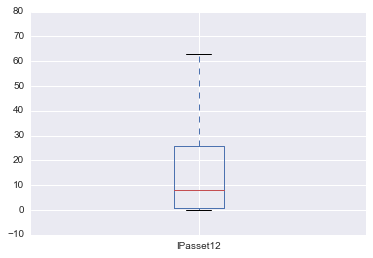

In [120]:
data_2012.activity.head()
print data_2012.elasticity12.max()
print data_2012.elasticity12.min()
print data_2012['IPasset12'].plot(kind ='box')
plt.ylim(-10,80)
# print data_2012.groupby('company').describe()


89
16.2320872274
Axes(0.125,0.125;0.775x0.775)


(-10, 80)

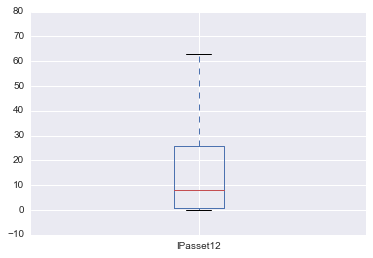

In [121]:
print data_2012.IPasset12.max()
print data_2012.IPasset12.mean()
print data_2012['IPasset12'].plot(kind ='box')
plt.ylim(-10,80)

53
3.57165109034
Axes(0.125,0.125;0.775x0.775)


(-5, 15)

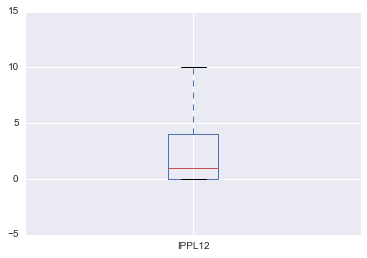

In [122]:
print data_2012.IPPL12.max()
print data_2012.IPPL12.mean()
print data_2012['IPPL12'].plot(kind ='box')
plt.ylim(-5,15)

count    1926.000000
mean       87.972285
std        93.312878
min         0.000000
25%        26.495000
50%        63.190000
75%       113.970000
max       813.190000
Name: gearing12, dtype: float64
Axes(0.125,0.125;0.775x0.775)


(0, 250)

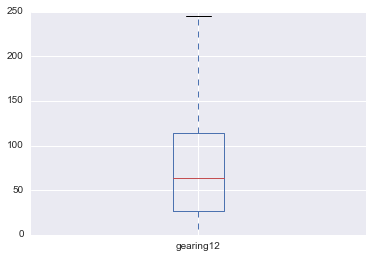

In [123]:
print data_2012['gearing12'].describe()
print data_2012['gearing12'].plot(kind ='box')
plt.ylim(0,250)

Axes(0.125,0.125;0.775x0.775)
count    1926.000000
mean        0.675914
std        10.879861
min      -418.570000
25%         0.640000
50%         0.900000
75%         1.110000
max       125.250000
Name: elasticity12, dtype: float64


(0, 2)

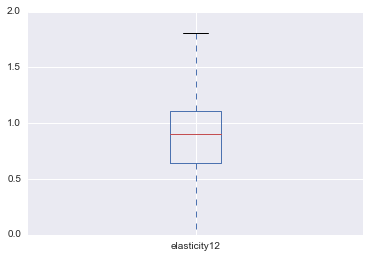

In [124]:
print data_2012['elasticity12'].plot(kind ='box')
print data_2012['elasticity12'].describe()
plt.ylim(0,2)

Axes(0.125,0.125;0.775x0.775)
count    1926.000000
mean       71.828141
std       158.645497
min        11.000000
25%        16.000000
50%        29.000000
75%        66.000000
max      2670.000000
Name: subs, dtype: float64


(0, 100)

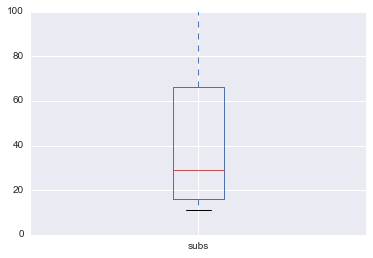

In [125]:
print data_2012['subs'].plot(kind ='box')
print data_2012['subs'].describe()
plt.ylim(0,100)

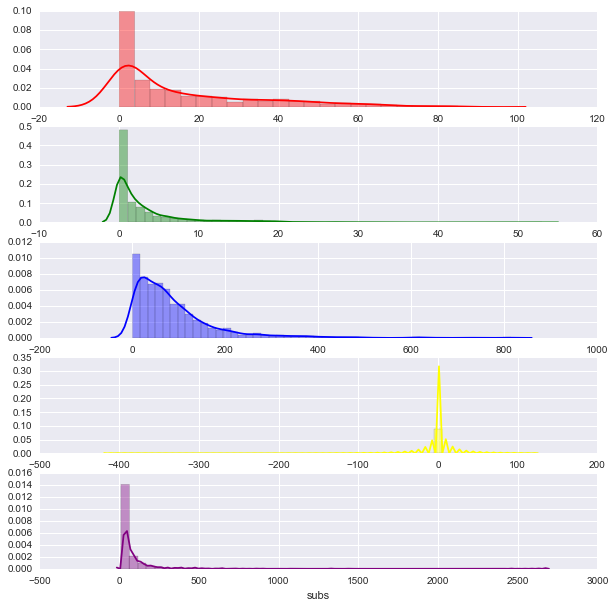

In [126]:
plt.rcParams['figure.figsize'] = (10,10)
fig, axs = plt.subplots(5,1)
sns.distplot(data_2012['IPasset12'], color='red', ax = axs[0])
sns.distplot(data_2012['IPPL12'], color='green', ax = axs[1])
sns.distplot(data_2012['gearing12'], color='blue', ax = axs[2])
sns.distplot(data_2012['elasticity12'], color='yellow', ax = axs[3])
sns.distplot(data_2012['subs'], color='purple', ax = axs[4])

In [127]:
### print '2012 correlation'
#print data_2012.corr()
#print ''
#colour_map = sns.diverging_palette(225, 125, as_cmap=True)
#print sns.heatmap(data_2012[['elasticity12','IPasset12','IPPL12','gearing12','subs']].corr(), cmap=colour_map)

In [128]:
data_2012['elasticity12'] = data_2012['elasticity12'].apply(lambda x: 0 if x < 1 else 1)

In [129]:
data_2012.head(10)

,company,elasticity12,IPasset12,IPPL12,gearing12,OM12,activity,country,subs
1,3D SYSTEMS CORPORATION,0,51,7,25.43,17.13,Services,United States of America,35.0
2,3M COMPANY,0,27,5,57.47,21.68,Services,United States of America,121.0
3,888 HOLDINGS PLC,1,52,7,0.54,10.30,Services,Gibraltar,15.0
4,A & A MATERIAL CORP,0,1,1,384.16,0.95,Manufacturing,Japan,11.0
5,"A-DATA TECHNOLOGY CO., LTD.",1,1,1,74.67,2.59,Manufacturing; Wholesale,Taiwan,11.0
6,A.O. SMITH CORPORATION,0,34,3,49.47,10.93,Manufacturing; Wholesale,United States of America,33.0
7,AASTRA TECHNOLOGIES LIMITED,0,13,9,17.30,3.84,Services,Canada,29.0
8,AB ELECTROLUX,0,13,2,102.49,3.72,Manufacturing,Sweden,102.0
9,AB SAGAX,0,0,0,249.35,86.33,Services,Sweden,84.0
10,AB VOLVO,1,8,5,188.36,5.82,Manufacturing,Sweden,62.0


In [130]:
# dummy_ranks_activity = pd.get_dummies(data_2012['activity'], prefix = 'activity', drop_first=False)
#dummy_ranks_country = pd.get_dummies(data_2012['country'], prefix = 'ctryname', drop_first= True)

In [131]:
df2 = pd.read_csv("additionalctrydata.csv")
df2.describe()
df2.columns

Index([u'country', u'GDPPC_2012', u'CPI_2012_Score'], dtype='object')

In [132]:
df2.count()

country           156
GDPPC_2012        155
CPI_2012_Score    155
dtype: int64

In [133]:
#print df2['GDPPC_2012'].plot(kind ='box')
#print df2['CPI_2012_Score'].plot(kind ='box')

In [134]:
data_2012 = pd.merge(left= data_2012, right= df2, how='left', left_on='country', right_on='country')
data_2012.dropna()
#data_2012

,company,elasticity12,IPasset12,IPPL12,gearing12,OM12,activity,country,subs,GDPPC_2012,CPI_2012_Score
0,3D SYSTEMS CORPORATION,0,51,7,25.43,17.13,Services,United States of America,35.0,49601.41,73.0
1,3M COMPANY,0,27,5,57.47,21.68,Services,United States of America,121.0,49601.41,73.0
2,888 HOLDINGS PLC,1,52,7,0.54,10.30,Services,Gibraltar,15.0,38200.00,74.0
3,A & A MATERIAL CORP,0,1,1,384.16,0.95,Manufacturing,Japan,11.0,46972.61,74.0
4,"A-DATA TECHNOLOGY CO., LTD.",1,1,1,74.67,2.59,Manufacturing; Wholesale,Taiwan,11.0,20502.70,61.0
5,A.O. SMITH CORPORATION,0,34,3,49.47,10.93,Manufacturing; Wholesale,United States of America,33.0,49601.41,73.0
6,AASTRA TECHNOLOGIES LIMITED,0,13,9,17.30,3.84,Services,Canada,29.0,51688.60,84.0
7,AB ELECTROLUX,0,13,2,102.49,3.72,Manufacturing,Sweden,102.0,57948.39,88.0
8,AB SAGAX,0,0,0,249.35,86.33,Services,Sweden,84.0,57948.39,88.0
9,AB VOLVO,1,8,5,188.36,5.82,Manufacturing,Sweden,62.0,57948.39,88.0


In [135]:
pd.crosstab(data_2012['activity'], data_2012['elasticity12'], margins = True)

elasticity12,0,1,All
activity,,,
Manufacturing,463,272,735
Manufacturing; Retail,0,8,8
Manufacturing; Services,44,31,75
Manufacturing; Wholesale,225,96,321
Manufacturing; Wholesale; Retail,0,1,1
Manufacturing; Wholesale; Services,8,4,12
Retail,4,10,14
Retail; Services,0,2,2
Retail; Wholesale,0,1,1


In [136]:
thing = pd.crosstab(data_2012['activity'], data_2012['elasticity12'], margins = True)

In [137]:
activities_to_rename = list(thing[thing['All'] < 15].reset_index().activity)
#?df.reset_index

In [138]:
activities_to_rename

['Manufacturing; Retail',
 'Manufacturing; Wholesale; Retail',
 'Manufacturing; Wholesale; Services',
 'Retail',
 'Retail; Services',
 'Retail; Wholesale',
 'Retail; Wholesale; Manufacturing',
 'Services; Manufacturing; Wholesale',
 'Services; Private equity firm',
 'Services; Retail',
 'Services; Venture capital firm',
 'Services; Wholesale',
 'Wholesale; Manufacturing',
 'Wholesale; Manufacturing; Services',
 'Wholesale; Retail',
 'Wholesale; Services']

In [139]:
#dummy_ranks_country.columns

In [140]:
data_2012['activity_clean'] = data_2012.activity

In [141]:
for activity in activities_to_rename:
    data_2012.loc[data_2012.activity == activity, 'activity_clean'] = 'other'

In [142]:
pd.crosstab(data_2012['activity_clean'], data_2012['elasticity12'], margins = True)

elasticity12,0,1,All
activity_clean,,,
Manufacturing,463,272,735
Manufacturing; Services,44,31,75
Manufacturing; Wholesale,225,96,321
Services,407,252,659
Services; Manufacturing,12,10,22
Wholesale,15,20,35
other,35,44,79
All,1201,725,1926


In [143]:
dummy_ranks_activity = pd.get_dummies(data_2012['activity_clean'], prefix = 'actyname', drop_first=True)
data_2012['intercept'] = 1.0

Axes(0.125,0.125;0.62x0.775)


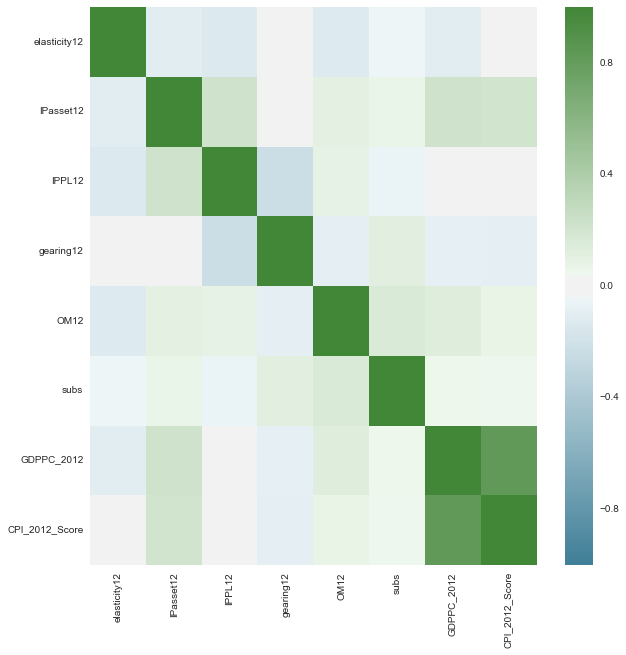

In [144]:
#print data_2012.corr()
#print ''
colour_map = sns.diverging_palette(225, 125, as_cmap=True)
print sns.heatmap(data_2012[['elasticity12','IPasset12','IPPL12','gearing12','OM12','subs','GDPPC_2012','CPI_2012_Score']].corr(), cmap=colour_map)

(0, 200)

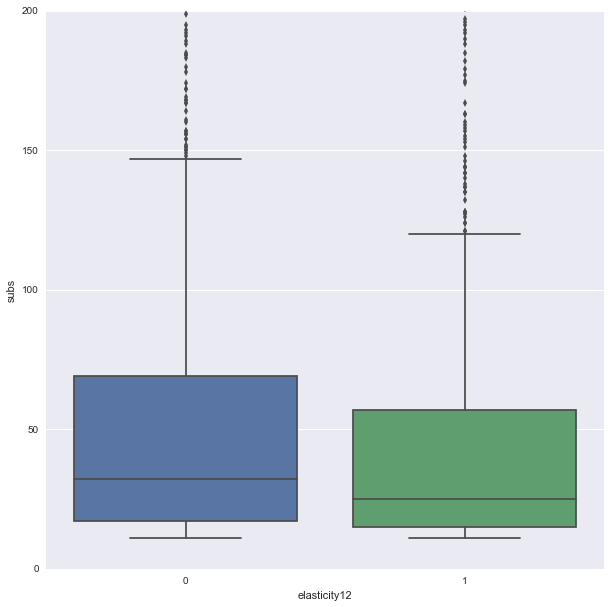

In [145]:
sns.boxplot(x='elasticity12', y='subs', data=data_2012)
plt.ylim(0,200)

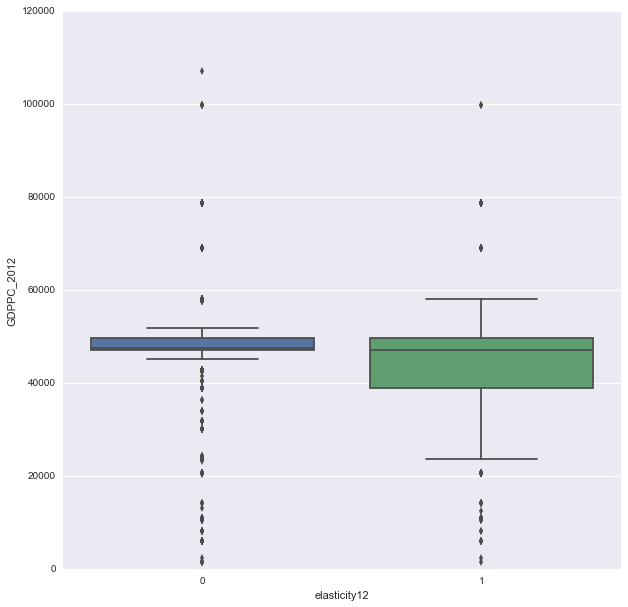

In [146]:
sns.boxplot(x='elasticity12', y='GDPPC_2012', data=data_2012)

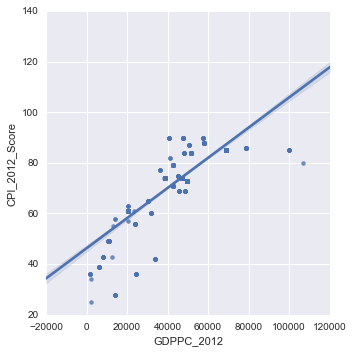

In [147]:
sns.lmplot(x='GDPPC_2012', y='CPI_2012_Score',  data=data_2012)

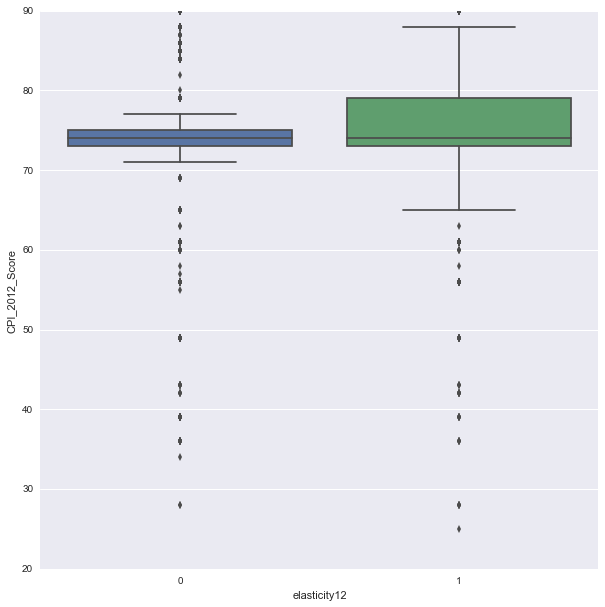

In [148]:
sns.boxplot(x='elasticity12', y='CPI_2012_Score', data=data_2012)

In [149]:
columns_to_keep = ['elasticity12','intercept','IPasset12','IPPL12','OM12','gearing12','subs','GDPPC_2012','CPI_2012_Score']
#data_2012 = data_2012[columns_to_keep].join([dummy_ranks_country,dummy_ranks_activity])

data_2012 = data_2012[columns_to_keep].join(dummy_ranks_activity)

#data_2012.ix[data_2012.index[(data_2012.T == np.nan).sum() > 1]]

In [150]:
# data_2012.count()

In [151]:
train_cols = data_2012.columns[1:]

In [152]:
logit = sm.Logit(data_2012['elasticity12'], data_2012[train_cols])

result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.625525
         Iterations 5


In [153]:
logit.fit().summary()

Optimization terminated successfully.
         Current function value: 0.625525
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           elasticity12   No. Observations:                 1926
Model:                          Logit   Df Residuals:                     1912
Method:                           MLE   Df Model:                           13
Date:                Sat, 10 Dec 2016   Pseudo R-squ.:                 0.05551
Time:                        22:29:19   Log-Likelihood:                -1204.8
converged:                       True   LL-Null:                       -1275.6
                                        LLR p-value:                 1.000e-23
=====================================================================================================
                                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
intercept                            -1.4848      0.469     -3.163      0.002        -2.405    -0.565
IPasset12                            -0.0074      0.003     -2.592      0.010        -0.013    -0.002
IPPL12                               -0.0437      0.011     -4.002      0.000        -0.065    -0.022
OM12                                 -0.0206      0.005     -4.226      0.000        -0.030    -0.011
gearing12                         -5.555e-05      0.001     -0.103      0.918        -0.001     0.001
subs                                 -0.0006      0.000     -1.477      0.140        -0.001     0.000
GDPPC_2012                        -4.049e-05   6.81e-06     -5.946      0.000     -5.38e-05 -2.71e-05
CPI_2012_Score                        0.0439      0.009      4.747      0.000         0.026     0.062
actyname_Manufacturing; Services      0.2904      0.255      1.139      0.255        -0.209     0.790
actyname_Manufacturing; Wholesale    -0.2270      0.148     -1.532      0.126        -0.517     0.063
actyname_Services                     0.2602      0.120      2.171      0.030         0.025     0.495
actyname_Services; Manufacturing      0.6991      0.448      1.561      0.118        -0.179     1.577
actyname_Wholesale                    0.7345      0.359      2.048      0.041         0.032     1.437
actyname_other                        0.7623      0.248      3.079      0.002         0.277     1.248
=====================================================================================================
"""

In [154]:
pd.crosstab(data_2012['elasticity12'], data_2012['actyname_Services'])
# % of Services companies with elasticity 1     = 38.2%
# % of non-Services companies with elasticity 1 = 37.3%

actyname_Services,0.0,1.0
elasticity12,,
0,794,407
1,473,252


In [155]:
conf_intervals = logit.fit().conf_int()
OR_conf_intervals = np.exp(conf_intervals)

coefficients = logit.fit().params
OR_coefficients = np.exp(coefficients)

df_odds_ratio = pd.DataFrame()
df_odds_ratio['OR'] = OR_coefficients
df_odds_ratio = df_odds_ratio.join(OR_conf_intervals)

df_odds_ratio.columns = ['odds_ratio', '2.5%', '97.5%']

df_odds_ratio

Optimization terminated successfully.
         Current function value: 0.625525
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.625525
         Iterations 5


,odds_ratio,2.5%,97.5%
intercept,0.226558,0.090289,0.568489
IPasset12,0.992632,0.987097,0.998198
IPPL12,0.957279,0.937028,0.977969
OM12,0.979566,0.970230,0.988991
gearing12,0.999944,0.998888,1.001002
subs,0.999441,0.998699,1.000183
GDPPC_2012,0.999960,0.999946,0.999973
CPI_2012_Score,1.044928,1.026138,1.064063
actyname_Manufacturing; Services,1.336935,0.811291,2.203149
actyname_Manufacturing; Wholesale,0.796943,0.596106,1.065446


In [156]:
# best way to plot?

In [157]:
# can't really do time series?

In [158]:
data_2012.head()

,elasticity12,intercept,IPasset12,IPPL12,OM12,gearing12,subs,GDPPC_2012,CPI_2012_Score,actyname_Manufacturing; Services,actyname_Manufacturing; Wholesale,actyname_Services,actyname_Services; Manufacturing,actyname_Wholesale,actyname_other
0,0,1.0,51,7,17.13,25.43,35.0,49601.41,73.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,1.0,27,5,21.68,57.47,121.0,49601.41,73.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,1.0,52,7,10.30,0.54,15.0,38200.00,74.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,1.0,1,1,0.95,384.16,11.0,46972.61,74.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1.0,1,1,2.59,74.67,11.0,20502.70,61.0,0.0,1.0,0.0,0.0,0.0,0.0


# Using scikit-learn

In [159]:
from sklearn.linear_model import LogisticRegression

In [160]:
model = LogisticRegression()

In [161]:
train_colsLG = ['IPPL12','OM12','GDPPC_2012','CPI_2012_Score','actyname_Services','actyname_Wholesale','actyname_other']
X = data_2012[train_colsLG]
y = data_2012['elasticity12']

In [162]:
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [163]:
model.score(X, y)

0.63136033229491173

In [164]:
#Returns the mean accuracy on the given test data and labels

In [165]:
from sklearn.cross_validation import cross_val_score
np.random.seed(1)
scores = cross_val_score(LogisticRegression(), X, y, scoring='roc_auc', cv=5)
print scores.mean()

0.642394202795


In [166]:
from sklearn.metrics import roc_curve, roc_auc_score
np.random.seed(1)
lr = LogisticRegression()
X = data_2012[train_colsLG]
y = data_2012['elasticity12']
lr.fit(X, y)

predictions = lr.predict(X)

In [167]:
pd.crosstab(predictions,data_2012['elasticity12'])
#accuracy 

elasticity12,0,1
row_0,,
0,1112,621
1,89,104


In [168]:
np.random.seed(1)
scores = cross_val_score(LogisticRegression(penalty='l1'), X, y, scoring='roc_auc', cv=5)
print scores.mean()

0.643518541041


In [169]:
np.random.seed(1)
scores = cross_val_score(LogisticRegression(penalty='l2'), X, y, scoring='roc_auc', cv=5)
print scores.mean()

0.642394202795


In [170]:
# help(LogisticRegression)

In [171]:
np.random.seed(1)
for C in range(1,20,1):
    scores = cross_val_score(LogisticRegression(penalty='l1', C=C), X, y, scoring='roc_auc', cv=5)

    C, scores.mean()

In [172]:
np.random.seed(1)
maxscore = scores.mean()
print C, maxscore.max()

19 0.643998604951


In [173]:
from sklearn.metrics import roc_curve, roc_auc_score
np.random.seed(1)
lr = LogisticRegression(penalty='l1', C=19)
X = data_2012[train_cols]
y = data_2012['elasticity12']
lr.fit(X, y)

predictions = lr.predict(X)
#probabilities = lr.predict_proba(X)
#plt.plot(roc_curve(data_2012[['elasticity12']], probabilities[:,1])[0],
#        roc_curve(data_2012[['elasticity12']], probabilities[:,1])[1])

#print "L1 odds ratio =", 1. / np.exp(LogisticRegression(penalty='l1').fit(X, y).coef_)
#print "L2 odds ratio =", 1. / np.exp(LogisticRegression(penalty='l2').fit(X, y).coef_)
#print "L2 + weaker regularisation strength =", 1. / np.exp(LogisticRegression(penalty='l1', C=1000).fit(X, y).coef_)

In [174]:
#plt.plot(roc_curve(data_2012[['elasticity12']], predictions)[0],
#         roc_curve(data_2012[['elasticity12']], predictions)[1])

In [175]:
#roc_auc_score(data_2012['elasticity12'], lr.predict(X))

In [176]:
pd.crosstab(predictions,data_2012['elasticity12'])

elasticity12,0,1
row_0,,
0,1068,532
1,133,193


Axes(0.125,0.125;0.62x0.775)


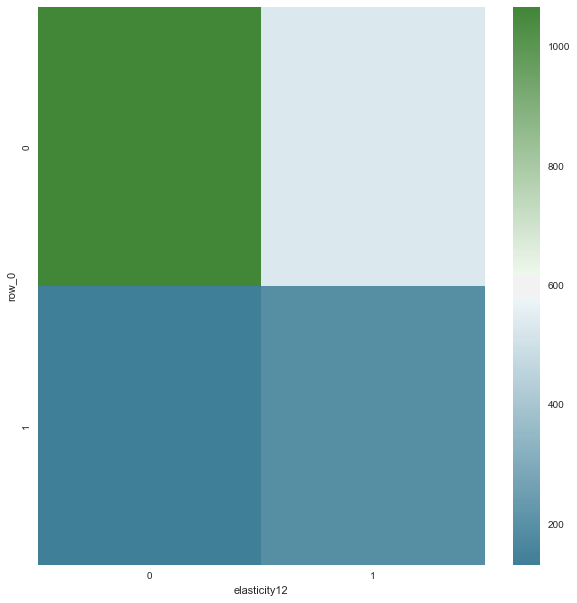

In [177]:
colour_map = sns.diverging_palette(225, 125, as_cmap=True)
print sns.heatmap(pd.crosstab(predictions,data_2012['elasticity12']), cmap = colour_map)

### build a decision tree model to predict the 'tax avoiders'

In [178]:
from os import system
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Select features

X = data_2012.copy()
y = X['elasticity12']
X.drop('elasticity12', axis=1, inplace=True)

# Fit the model
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [179]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(DecisionTreeClassifier(), X, y, scoring='roc_auc', cv=5)

print "Cross-validated AUC scores: ", scores
print "Average AUC:", scores.mean()

Cross-validated AUC scores:  [ 0.59334669  0.5595546   0.56443966  0.54856322  0.59066092]
Average AUC: 0.571313015691


In [180]:
data_2012.columns

Index([u'elasticity12', u'intercept', u'IPasset12', u'IPPL12', u'OM12',
       u'gearing12', u'subs', u'GDPPC_2012', u'CPI_2012_Score',
       u'actyname_Manufacturing; Services',
       u'actyname_Manufacturing; Wholesale', u'actyname_Services',
       u'actyname_Services; Manufacturing', u'actyname_Wholesale',
       u'actyname_other'],
      dtype='object')

In [181]:
max_depth = 16
min_samples_leaf = 16
model = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
model.fit(X, y)
print scores.mean()


0.571313015691


In [182]:
from sklearn.ensemble import RandomForestClassifier

#np.random.seed(1)
#model = RandomForestClassifier(n_estimators = 50)
    
#model.fit(X, y)
#predictionsRF = model.predict(X)

In [183]:
np.random.seed(1)
#scores = cross_val_score(model, X, y, scoring='roc_auc', cv=5)
#print "Cross-validated AUC scores: ", scores
#print "Average AUC:", scores.mean()
#print

for n_trees in range(50, 150,5):
    model = RandomForestClassifier(max_depth=16, min_samples_leaf=16,n_estimators = n_trees)
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=5)
    
    print('n trees: {}, CV AUC {}, Average AUC {}'.format(n_trees, scores, scores.mean()))

n trees: 50, CV AUC [ 0.70404922  0.65873563  0.70718391  0.64856322  0.67991379], Average AUC 0.679689154385
n trees: 55, CV AUC [ 0.70253255  0.66847701  0.70264368  0.65968391  0.67985632], Average AUC 0.682638694138
n trees: 60, CV AUC [ 0.71003005  0.65893678  0.69942529  0.65991379  0.6758908 ], Average AUC 0.680839342777
n trees: 65, CV AUC [ 0.69082844  0.67491379  0.71152299  0.65675287  0.67270115], Average AUC 0.681343849859
n trees: 70, CV AUC [ 0.70330519  0.65729885  0.70692529  0.64600575  0.67327586], Average AUC 0.677362188201
n trees: 75, CV AUC [ 0.69809701  0.65649425  0.71008621  0.64781609  0.68376437], Average AUC 0.679251585825
n trees: 80, CV AUC [ 0.71231936  0.66238506  0.71031609  0.65227011  0.66445402], Average AUC 0.68034892927
n trees: 85, CV AUC [ 0.69360424  0.66353448  0.7133908   0.65020115  0.67353448], Average AUC 0.678853030953
n trees: 90, CV AUC [ 0.69188725  0.66304598  0.70896552  0.64356322  0.69166667], Average AUC 0.679825726141
n trees: 95

In [184]:
np.random.seed(1)
model = RandomForestClassifier(max_depth=16, min_samples_leaf=16, n_estimators = 65)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=5)
model.fit(X, y)
predictionsRF = model.predict(X)
print scores.mean()

0.683087900033


In [185]:
model.fit(X, y)

# Get columns and their scores
features = X.columns
feature_importances = model.feature_importances_
features_data_2012 = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_data_2012.sort_values('Importance Score', inplace=True, ascending=False)

features_data_2012.head(10)

,Features,Importance Score
6,GDPPC_2012,0.213931
3,OM12,0.177221
7,CPI_2012_Score,0.147731
2,IPPL12,0.111292
5,subs,0.108544
1,IPasset12,0.104828
4,gearing12,0.096159
10,actyname_Services,0.016348
9,actyname_Manufacturing; Wholesale,0.013279
13,actyname_other,0.008312


In [186]:
pd.crosstab(predictionsRF,data_2012['elasticity12'])

elasticity12,0,1
row_0,,
0,1093,398
1,108,327


In [187]:
from sklearn.metrics import confusion_matrix
confusion_matrix(data_2012['elasticity12'],predictionsRF)

array([[1093,  108],
       [ 398,  327]])

In [188]:
train_cols2= ['elasticity12','OM12','gearing12','subs','IPasset12','GDPPC_2012','IPPL12','CPI_2012_Score']

X = data_2012[train_cols2].copy()
y = X['elasticity12']
X.drop('elasticity12', axis=1, inplace=True)

# Fit the model
model = DecisionTreeClassifier()
model.fit(X, y)

scores = cross_val_score(DecisionTreeClassifier(), X, y, scoring='roc_auc', cv=5)

print "Cross-validated AUC scores: ", scores
print "Average AUC:", scores.mean()



Cross-validated AUC scores:  [ 0.57195593  0.5595546   0.56522989  0.55193966  0.59468391]
Average AUC: 0.568672795345


In [189]:
np.random.seed(1)
model = RandomForestClassifier(max_depth=16, min_samples_leaf=16, n_estimators = 60)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=5)
model.fit(X, y)
predictionsRF2 = model.predict(X)
print scores.mean()

0.681542757667


In [190]:
pd.crosstab(predictionsRF2,data_2012['elasticity12'])

elasticity12,0,1
row_0,,
0,1095,365
1,106,360


In [191]:
train_cols3= ['elasticity12','OM12','IPasset12','GDPPC_2012','IPPL12','CPI_2012_Score', 'actyname_Services', 'actyname_Wholesale', 'actyname_other']

X = data_2012[train_cols3].copy()
y = X['elasticity12']
X.drop('elasticity12', axis=1, inplace=True)

# Fit the model
model = DecisionTreeClassifier()
model.fit(X, y)

scores = cross_val_score(DecisionTreeClassifier(), X, y, scoring='roc_auc', cv=5)

print "Cross-validated AUC scores: ", scores
print "Average AUC:", scores.mean()


Cross-validated AUC scores:  [ 0.60439262  0.55890805  0.61867816  0.57693966  0.58103448]
Average AUC: 0.587990592359


In [192]:
np.random.seed(1)
for n_trees in range(60,102,3):
    model = RandomForestClassifier(max_depth=16, min_samples_leaf=16, n_estimators = n_trees)
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=5)

    print('n trees: {}, CV AUC {}, Average AUC {}'.format(n_trees, scores, scores.mean()))


n trees: 60, CV AUC [ 0.70286164  0.67380747  0.71698276  0.68711207  0.70788793], Average AUC 0.697730373921
n trees: 63, CV AUC [ 0.69969953  0.66702586  0.71433908  0.67505747  0.69182471], Average AUC 0.689589330853
n trees: 66, CV AUC [ 0.69673773  0.66510057  0.71163793  0.67321839  0.6999569 ], Average AUC 0.689330304765
n trees: 69, CV AUC [ 0.70744026  0.67047414  0.70978448  0.67622126  0.69899425], Average AUC 0.69258288024
n trees: 72, CV AUC [ 0.71161826  0.66521552  0.72110632  0.66998563  0.71320402], Average AUC 0.696225950303
n trees: 75, CV AUC [ 0.70480755  0.67053161  0.71666667  0.6821408   0.69896552], Average AUC 0.694622430486
n trees: 78, CV AUC [ 0.7078552   0.66331897  0.70527299  0.66877874  0.69823276], Average AUC 0.688691729861
n trees: 81, CV AUC [ 0.70015739  0.6645546   0.71354885  0.67905172  0.70590517], Average AUC 0.692643547002
n trees: 84, CV AUC [ 0.70193161  0.65872126  0.71484195  0.67353448  0.70199713], Average AUC 0.690205286879
n trees: 87

In [193]:
np.random.seed(1)
model = RandomForestClassifier(max_depth=16, min_samples_leaf=16, n_estimators = 60)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=5)
model.fit(X, y)
predictionsRF3 = model.predict(X)
print scores.mean()

0.697730373921


In [194]:
pd.crosstab(predictionsRF3,data_2012['elasticity12'])

elasticity12,0,1
row_0,,
0,1064,404
1,137,321


In [195]:
data_2012.describe()

,elasticity12,intercept,IPasset12,IPPL12,OM12,gearing12,subs,GDPPC_2012,CPI_2012_Score,actyname_Manufacturing; Services,actyname_Manufacturing; Wholesale,actyname_Services,actyname_Services; Manufacturing,actyname_Wholesale,actyname_other
count,1926.000000,1926.0,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000
mean,0.376428,1.0,16.232087,3.571651,11.488079,87.972285,71.828141,46151.194699,73.773105,0.038941,0.166667,0.342160,0.011423,0.018172,0.041018
std,0.484615,0.0,19.189977,5.611473,12.079024,93.312878,158.645497,13835.259452,9.905262,0.193504,0.372775,0.474556,0.106292,0.133609,0.198383
min,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,11.000000,1454.650000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.0,1.000000,0.000000,4.325000,26.495000,16.000000,42793.080000,73.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.0,8.000000,1.000000,8.050000,63.190000,29.000000,46972.610000,74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.0,26.000000,4.000000,14.160000,113.970000,66.000000,49601.410000,79.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.0,89.000000,53.000000,100.000000,813.190000,2670.000000,106958.460000,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
